In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from rover_model.reactor_net import ReactorInference
from rover_model.reactor_net import ReactorConfig

In [2]:
model_path = '/home/pu/workspace/models/rover_reactor_june_11'
ckpt = tf.train.get_checkpoint_state(model_path)
config = ReactorConfig(
    feature_units=64, frame_units=128, 
    path=ckpt.model_checkpoint_path, scope_name='reactor_model')
inference = ReactorInference(config)

INFO:tensorflow:Restoring parameters from /home/pu/workspace/models/rover_reactor_june_11/reactor_model-49158


In [3]:
frame_path = '/home/pu/dataset/rover_train/WC_20170613/frames.uint8.bin'
frames = np.fromfile(frame_path, dtype=np.uint8).reshape((-1, 160, 320, 3))
feature_path = '/home/pu/dataset/rover_train/WC_20170613/features.float32.bin'
features = np.fromfile(feature_path, dtype=np.float32).reshape((-1, 5))
label_path = '/home/pu/dataset/rover_train/WC_20170613/labels.int32.bin'
labels = np.fromfile(label_path, dtype=np.int32).reshape(4, -1)
steers = labels[2]
actions = []

In [4]:
for i in range(1000):
    frame = frames[i]
    feature = features[i]
    actions.append(inference.consume(frame, feature))

In [6]:
actions[1]

array([  5.31962323e-05,   1.15310127e-06,   1.58368195e-07,
         1.16579895e-05,   4.41141174e-06,   9.90669370e-01,
         7.27285258e-03,   8.36753752e-04,   3.12727639e-06,
         1.14720687e-03], dtype=float32)

actions and labels 9 9
features [ 0.99999303 -0.00373011  0.99999779  0.00208974  0.3852036 ]


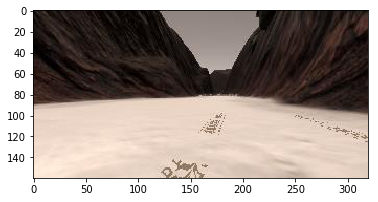

In [46]:
index = 855
print('actions and labels', np.argmax(actions[index]), steers[index])
print('features', features[index])
plt.imshow(frames[index])
plt.show()

In [42]:
actions[830]

array([  2.02530686e-07,   1.97649630e-08,   3.94663219e-10,
         4.36879396e-12,   8.78223221e-13,   2.49553227e-06,
         4.81335197e-12,   4.26526065e-04,   9.99496698e-01,
         7.39838797e-05], dtype=float32)